In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Problem Statement:- Given Walmart dataset having shape(550068,10) and columns as (User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProductCategory,Purchase).Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


Analysing basic metrics of data:-

In [7]:
# Shape of the data
df.shape

(550068, 10)

In [8]:
# Info of the data:-Types of columns,dtype of columns and checking for null values- There are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
# checking for null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [11]:
#checking for unique rows and sorting on its basis
df.nunique().sort_values(ascending = False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [21]:
# checking for duplicated rows
df.duplicated().sum()

0

In [33]:
df['Purchase'].mean()

9263.968712959126

In [23]:
# Description of unique,count and mean,standard deviation of given int columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [26]:
# Transposing the above data
df.describe(include=['object']).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


Observations:-

1)There are 5891 unique users. 
2)There are 3631 unique products. 
3)Men are more frequent buyers than Females.
4)There are 7 unique age categories. The most frequent buyers fall under the age group of 26-35.
5)There are 3 different city categories. Most frequent buyers fall under city_category B.

Value_counts of given columns to have detailed analysis:-

In [27]:
df['User_ID'].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

--->customer with user_id '1001680' is the most frequent buyer

In [28]:
df['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

--->Product having id as P00265242 is the most bought.

In [29]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

--->There are 414259 male and 135809 female customers are there in the given data.

In [30]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

---> Theres are 324731 unmarried and 225337 married customers in the given data

In [31]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

---> Most of the customers fall under age bracket of 26-35 

In [32]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

---> Most of the customers fall under the city category of B followed by C and A

In [33]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

---> Most of the customers stay in their current city since 1 year

In [34]:
df['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

---> customers having occupation as 4 are high

In [35]:
df['Purchase'].value_counts()

Purchase
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: count, Length: 18105, dtype: int64

In [36]:
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

---> Products under category 5 are more

Bivariate value_counts - on the basis of gender

In [46]:
df.groupby('Gender')['Marital_Status'].value_counts()

Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
Name: count, dtype: int64

--->Among female customers,78821 are unmarried and 56988 are married.
Among male customers,245910 are unmarried and 168349 are married.

In [47]:
#customers distribution on the basis of age among gender
df.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: count, dtype: int64

In [49]:
#customers distribution based on the years they stayed in current city among gender
df.groupby('Gender')['Stay_In_Current_City_Years'].value_counts()

Gender  Stay_In_Current_City_Years
F       1                              51298
        3                              24520
        2                              24332
        4+                             18596
        0                              17063
M       1                             142523
        2                              77506
        3                              70765
        4+                             66130
        0                              57335
Name: count, dtype: int64

In [53]:
df.groupby('Gender')['Product_Category'].value_counts()

Gender  Product_Category
F       5                    41961
        8                    33558
        1                    24831
        3                     6006
        2                     5658
        11                    4739
        6                     4559
        4                     3639
        16                    2402
        12                    1532
        13                    1462
        10                    1162
        15                    1046
        7                      943
        20                     723
        14                     623
        19                     451
        18                     382
        9                       70
        17                      62
M       1                   115547
        5                   108972
        8                    80367
        11                   19548
        2                    18206
        6                    15907
        3                    14207
        4                     

In [54]:
df.groupby('Gender')['City_Category'].value_counts()

Gender  City_Category
F       B                 57796
        C                 42309
        A                 35704
M       B                173377
        C                128866
        A                112016
Name: count, dtype: int64

In [55]:
df.groupby('Gender')['Occupation'].value_counts()

Gender  Occupation
F       0             18112
        1             17984
        4             17836
        7             10028
        20             8811
        2              8629
        6              8160
        3              7919
        14             6763
        9              5843
        16             4107
        10             4003
        17             3929
        12             3469
        15             2390
        5              2220
        19             2017
        11             1500
        13             1498
        8               361
        18              230
M       4             54472
        0             51526
        7             49105
        17            36114
        1             29442
        12            27710
        20            24751
        16            21264
        14            20546
        2             17959
        6             12195
        11            10086
        5              9957
        15             9775
 

Bivariate value_counts on the basis of Marital_Status

In [57]:
df.groupby('Marital_Status')['Age'].value_counts()

Marital_Status  Age  
0               26-35    133296
                18-25     78544
                36-45     66377
                0-17      15102
                46-50     12690
                51-55     10839
                55+        7883
1               26-35     86291
                36-45     43636
                46-50     33011
                51-55     27662
                18-25     21116
                55+       13621
Name: count, dtype: int64

In [58]:
df.groupby('Marital_Status')['Product_Category'].value_counts()

Marital_Status  Product_Category
0               5                   89656
                1                   84375
                8                   65411
                11                  14668
                2                   14138
                3                   12359
                6                   12139
                4                    7177
                16                   5713
                15                   3623
                13                   3162
                10                   2778
                7                    2040
                12                   2034
                18                   1641
                20                   1480
                19                    946
                14                    846
                17                    298
                9                     247
1               5                   61277
                1                   56003
                8                   48514
 

In [59]:
df.groupby('Marital_Status')['Stay_In_Current_City_Years'].value_counts()

Marital_Status  Stay_In_Current_City_Years
0               1                             110696
                2                              60800
                3                              57647
                4+                             50680
                0                              44908
1               1                              83125
                2                              41038
                3                              37638
                4+                             34046
                0                              29490
Name: count, dtype: int64

In [60]:
df.groupby('Marital_Status')['Occupation'].value_counts()

Marital_Status  Occupation
0               4             52776
                0             40489
                7             33403
                1             24724
                17            22732
                20            17162
                12            16680
                14            16062
                2             14306
                16            13368
                10            12177
                6             11190
                3             10364
                5              7608
                11             7140
                19             6926
                15             6650
                13             3630
                18             3615
                9              3038
                8               691
1               0             29149
                7             25730
                1             22702
                4             19532
                17            17311
                20            16400
 

Bivariate analysis on the basis of age,occupation,marital_status,city_category etc., - to analyse purchasing behaviours

In [61]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [62]:
df.groupby(['Occupation'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


In [63]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [64]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


In [65]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [66]:
df.groupby(['Product_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


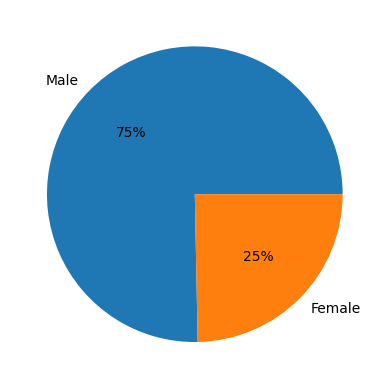

In [9]:
# plotting gender composition using pie plot 
gender_counts = df['Gender'].value_counts()
labels = ['Male','Female']
plt.pie(gender_counts, labels=labels,autopct = '%0.0f%%')
plt.show()

-Out of 0.54 million entries, 75% records are of men and 25% of women.

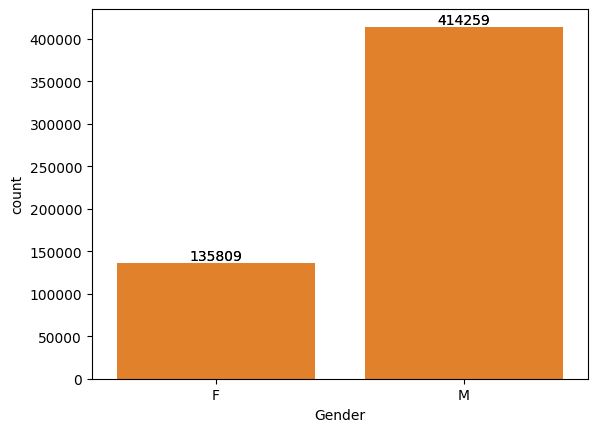

In [6]:
# plotting gender composition using countplot
sns.countplot(data = df, x='Gender')
counts = df['Gender'].value_counts()
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)

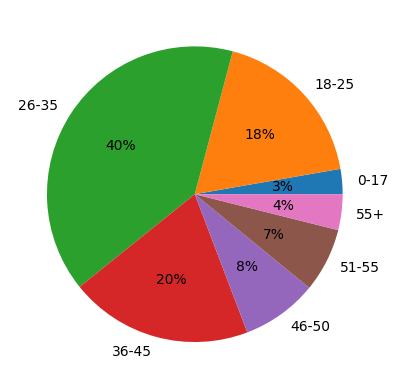

In [17]:
# plotting age composition using pieplot
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels=labels,autopct = '%0.0f%%')
plt.show()

-40% of the customers fall under the age group of 26-35.
-Age group 0-17 and 55+ are the least frequent customers which is only 3% and 4% of the data respectively.

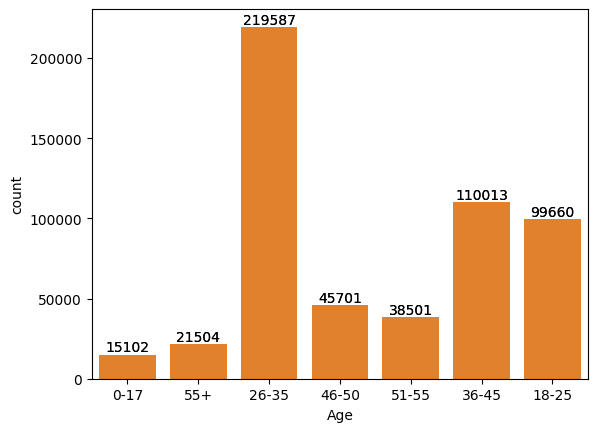

In [16]:
# plotting age composition using countplot
sns.countplot(data = df, x='Age')
counts = df['Age'].value_counts()
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)

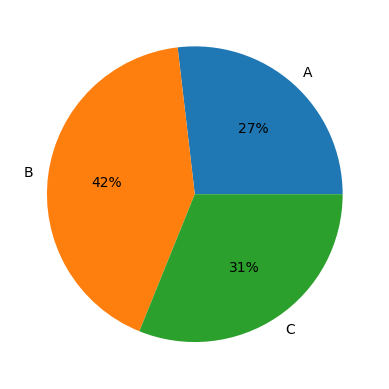

In [18]:
#plotting city composition using pieplot
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels=labels,autopct = '%0.0f%%')
plt.show()

--->There are 42% customers from City Category B, 31% from Category C and 27% from Category A

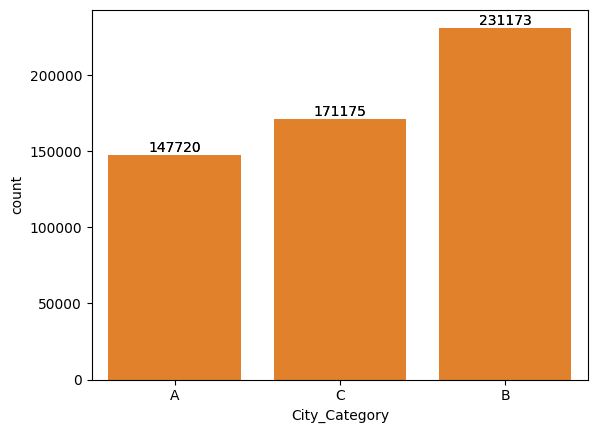

In [19]:
#plotting city composition using countplot
sns.countplot(data = df, x='City_Category')
counts = df['City_Category'].value_counts()
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

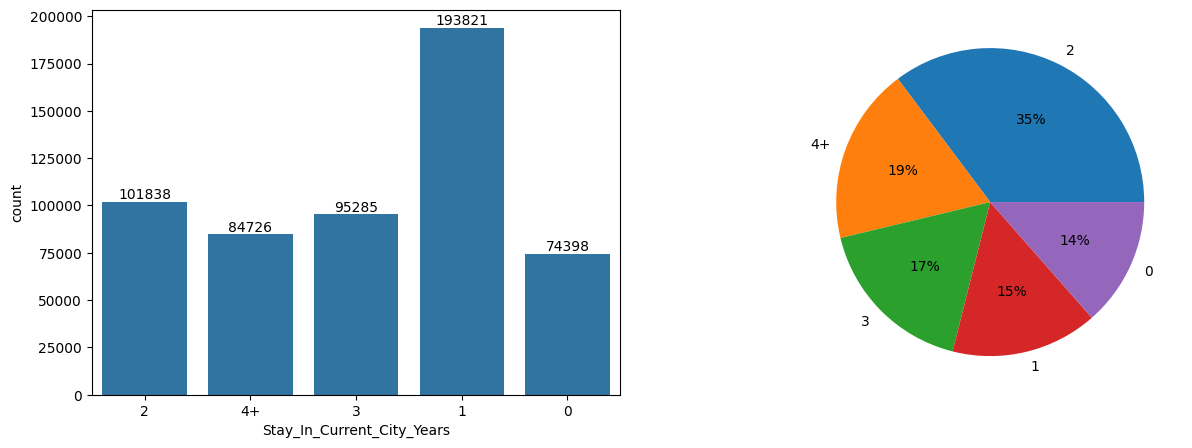

In [28]:
# plotting stay_In_Current_City_Years column using countplot and pieplot
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)          
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1,2,2)
stay_years= df['Stay_In_Current_City_Years'].value_counts()
labels= ['2','4+','3','1','0']
plt.pie(stay_years,labels = labels,autopct='%0.0f%%')
plt.show()

--->Most customers are in their current cities since 1 year followed by 2 years and 3 years.

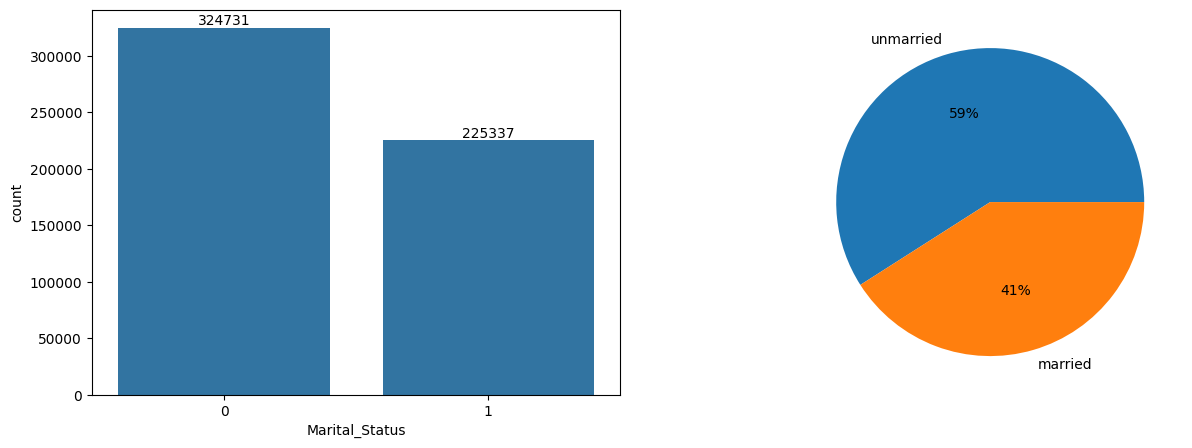

In [30]:
# plotting marital_status column using countplot and pieplot
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)          
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1,2,2)
stay_years= df['Marital_Status'].value_counts()
labels= ['unmarried','married']
plt.pie(stay_years,labels = labels,autopct='%0.0f%%')
plt.show()

--->We can observe that 59% of the frequent customers are of unmarried people, while 41% of married.
There are an approximate of 0.32 million entries for unmarried people and 0.22 million for married people.

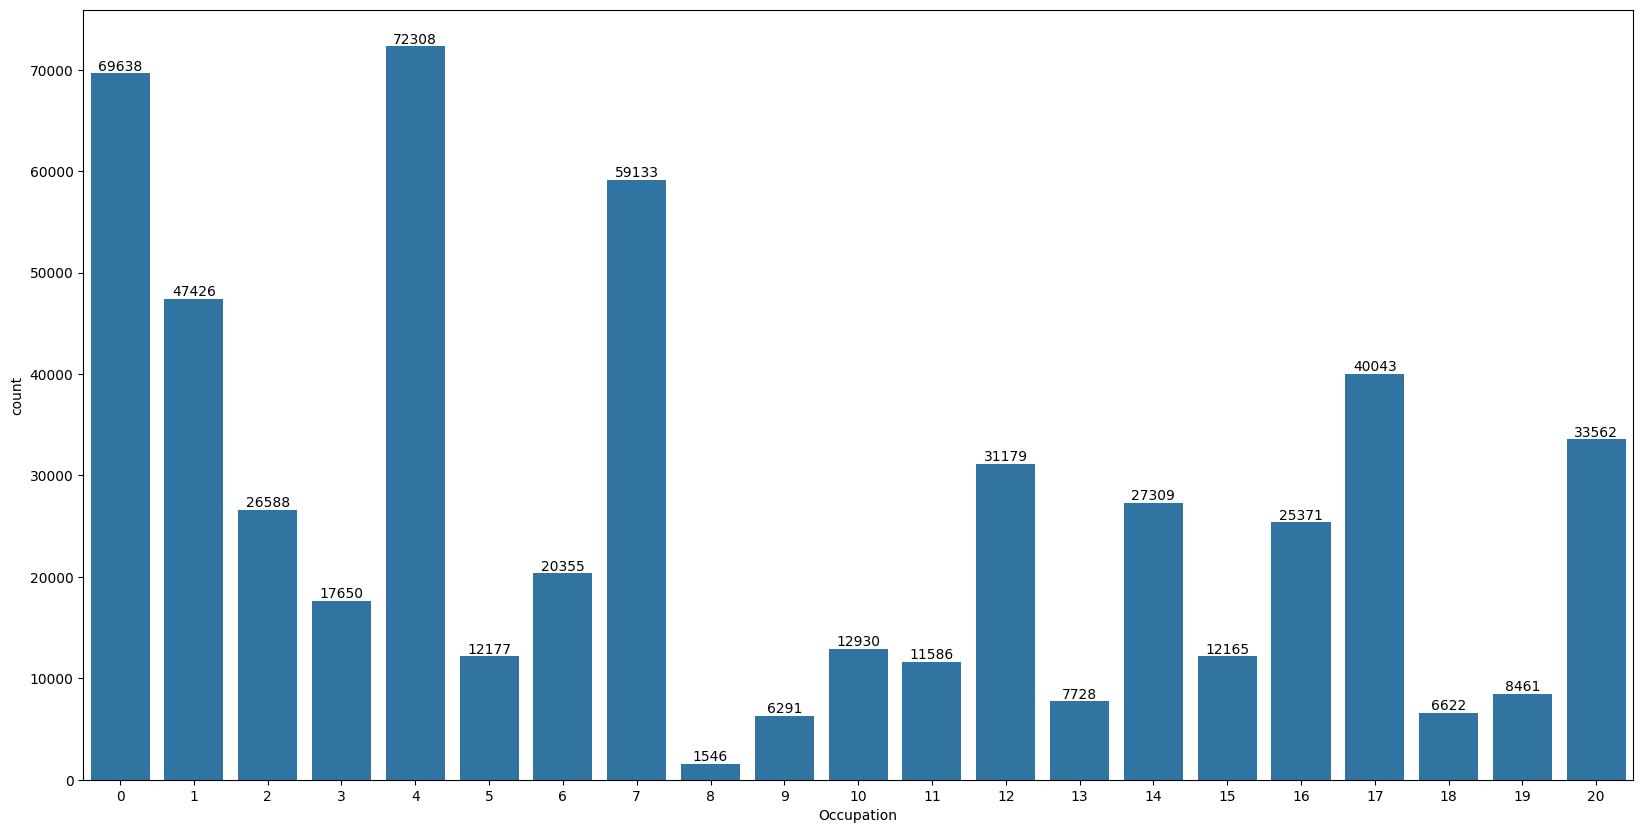

In [33]:
# plotting occupation column using countplot
plt.figure(figsize = (20,10))
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)
plt.show()

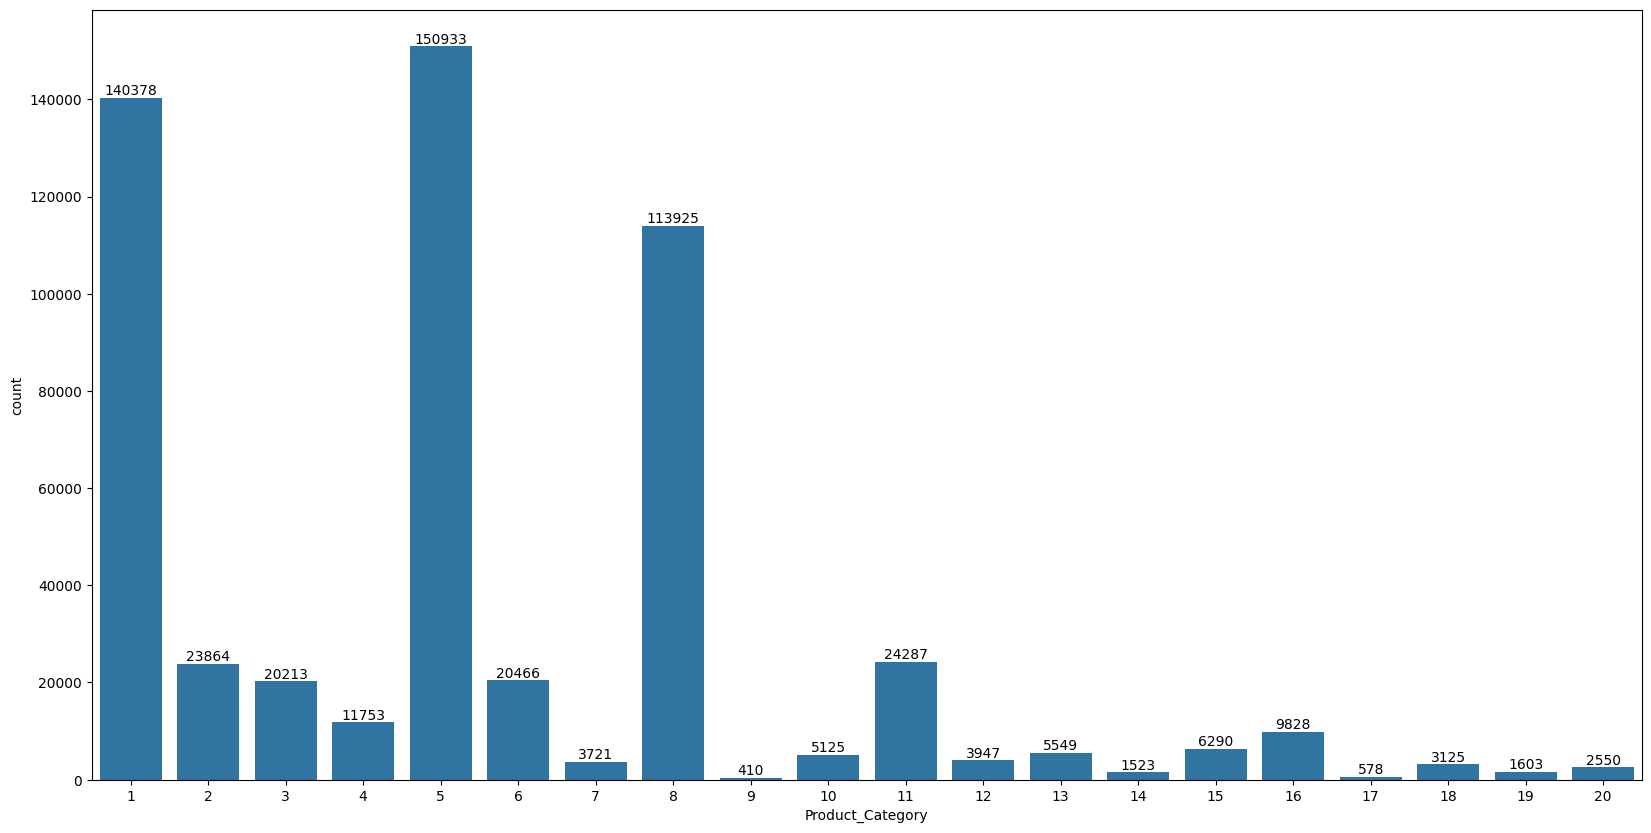

In [35]:
# plotting product_category using countplot
plt.figure(figsize=(20,10))
label = sns.countplot(data = df, x='Product_Category')
for i in label.containers:
    label.bar_label(i)
plt.show()

---> Products 5,1,8 are highest 

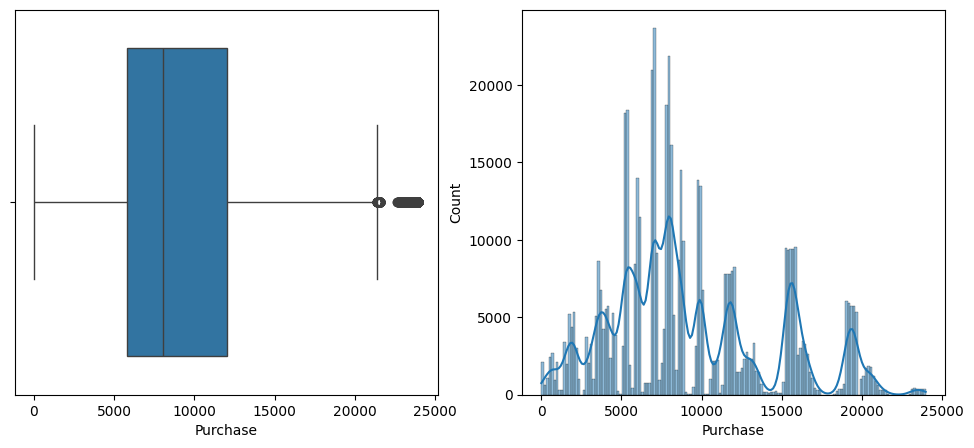

In [41]:
#Plotting box-plot and hist plot on purchase data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

While observing the purchase values of the orders we can infer that
-Most of the values lies between 6000 and 12000.
-Most order values lies in the range of 5000 - 10000
-There are more orders in the range 5000 - 8000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.

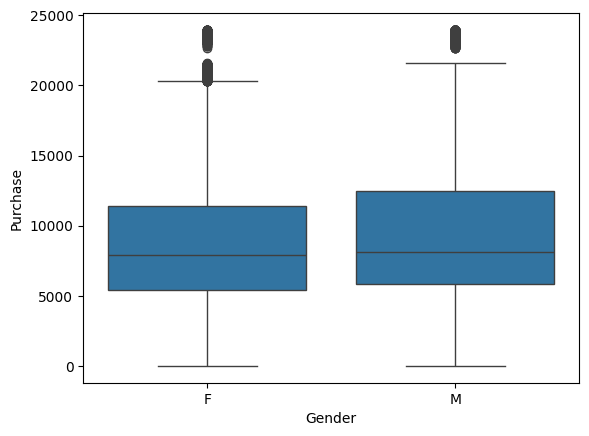

In [42]:
# plotting box-plot on the purchase and gender
sns.boxplot(data = df, y ='Purchase', x = 'Gender')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

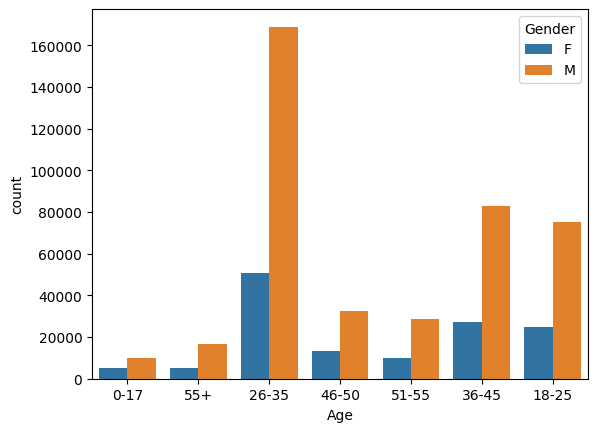

In [46]:
#plotting age and gender using countplot
sns.countplot(data=df,x='Age',hue='Gender')

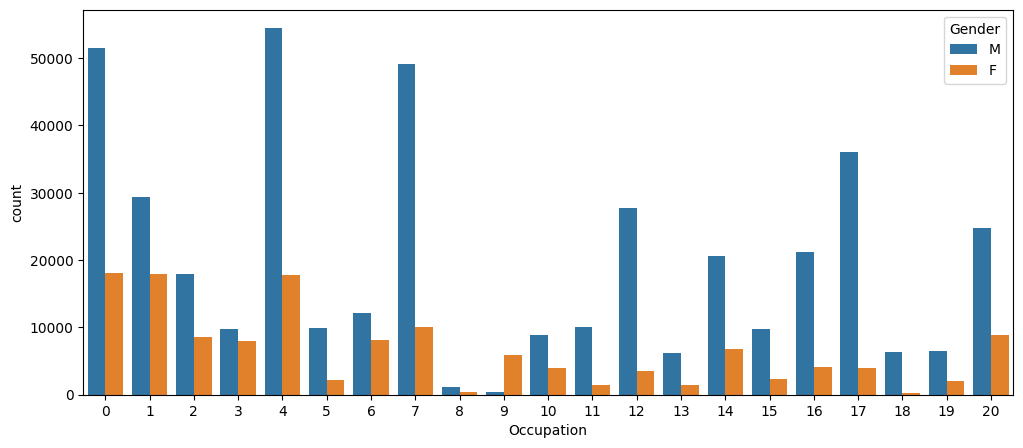

In [55]:
plt.figure(figsize = (12,5))
sns.countplot(data=df,x='Occupation',hue='Gender')
plt.show()

<Axes: xlabel='City_Category', ylabel='count'>

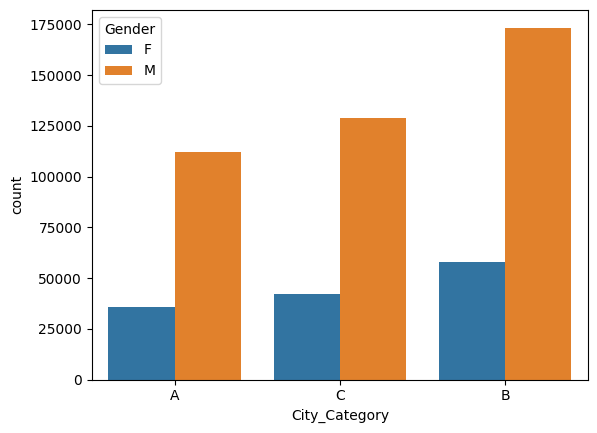

In [50]:
sns.countplot(data=df,x='City_Category',hue='Gender')

In [30]:
df.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


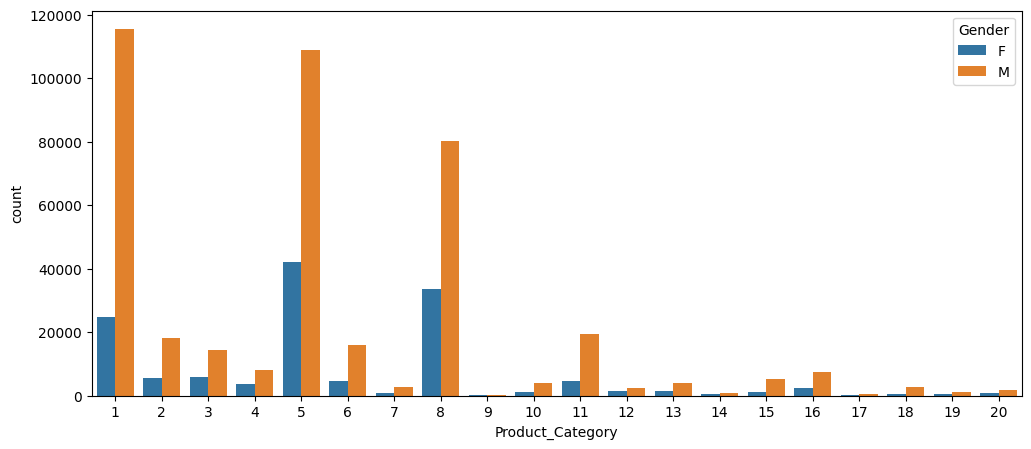

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category',hue='Gender')
plt.show()

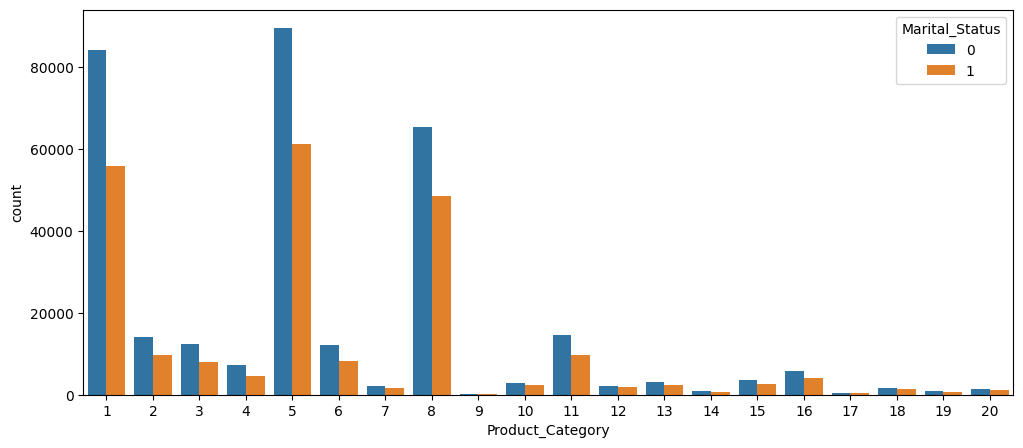

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category',hue='Marital_Status')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

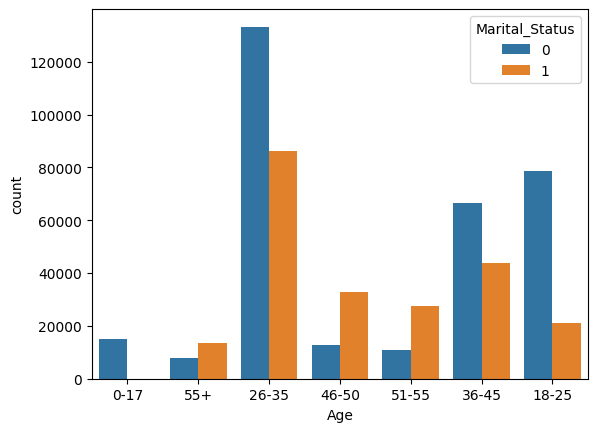

In [56]:
sns.countplot(data=df,x='Age',hue='Marital_Status')

<Axes: xlabel='Gender', ylabel='count'>

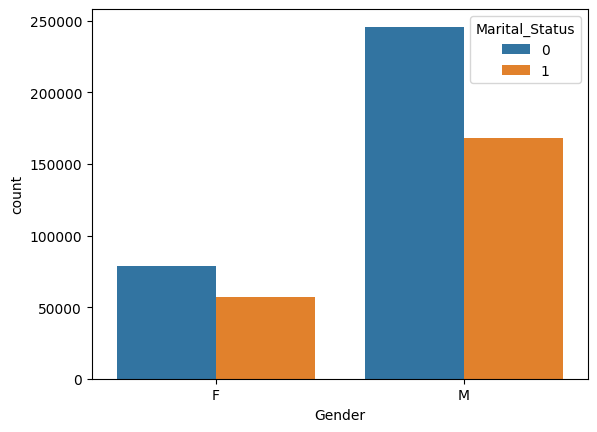

In [60]:
sns.countplot(data=df,x='Gender',hue='Marital_Status')

<Axes: xlabel='Product_Category', ylabel='Purchase'>

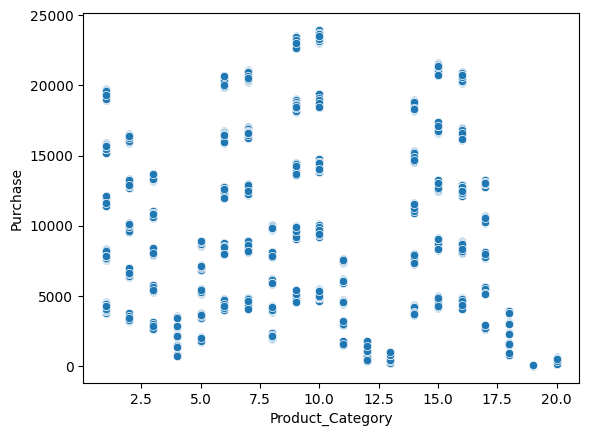

In [3]:
sns.scatterplot(data=df,x='Product_Category',y ='Purchase')

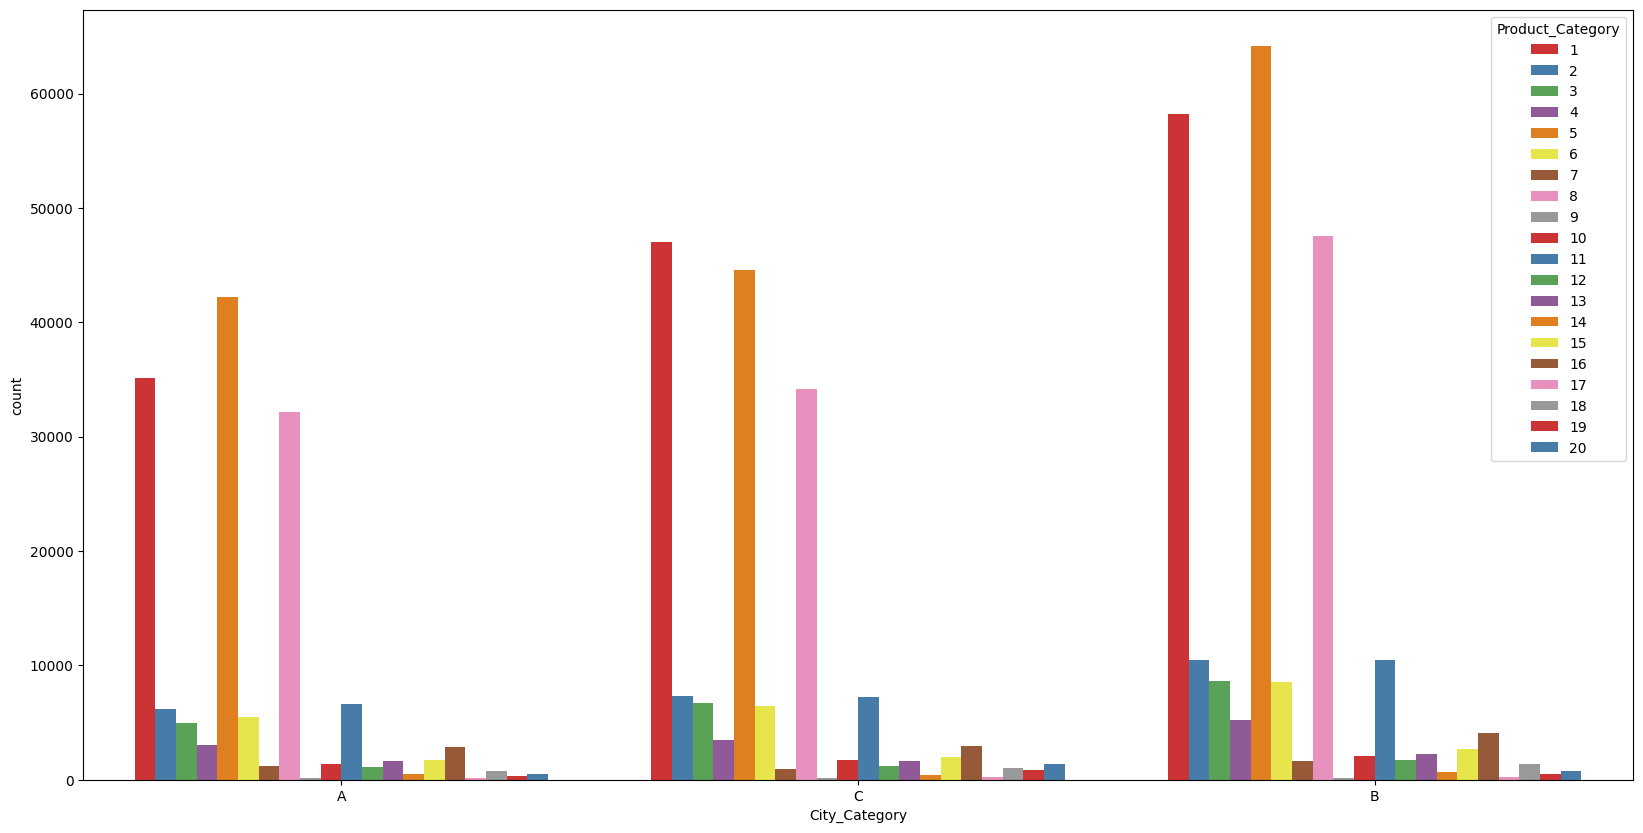

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='City_Category',hue='Product_Category',palette = 'Set1')
plt.show()

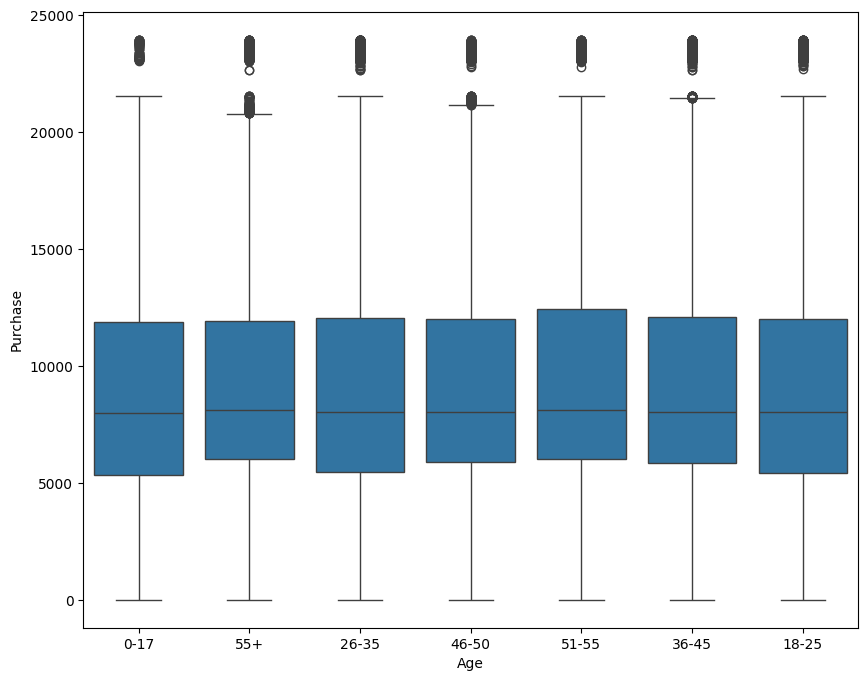

In [38]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, y ='Purchase', x = 'Age')
plt.show()

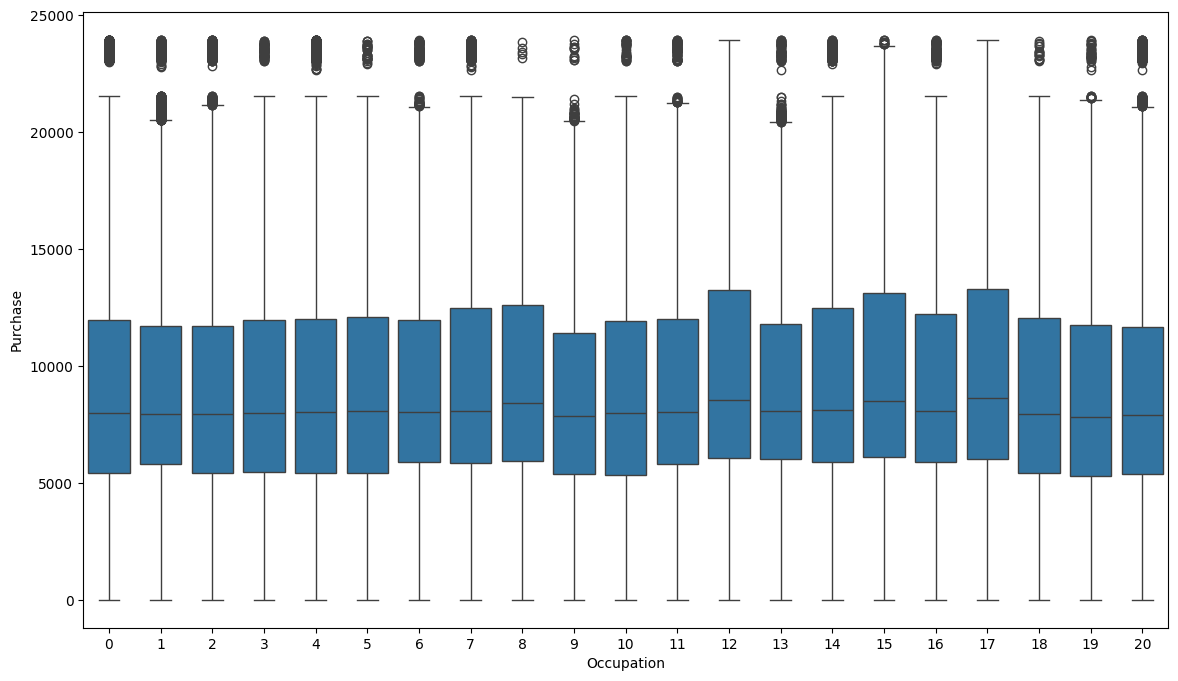

In [37]:
plt.figure(figsize = (14,8))
sns.boxplot(data = df, y ='Purchase', x = 'Occupation')
plt.show()

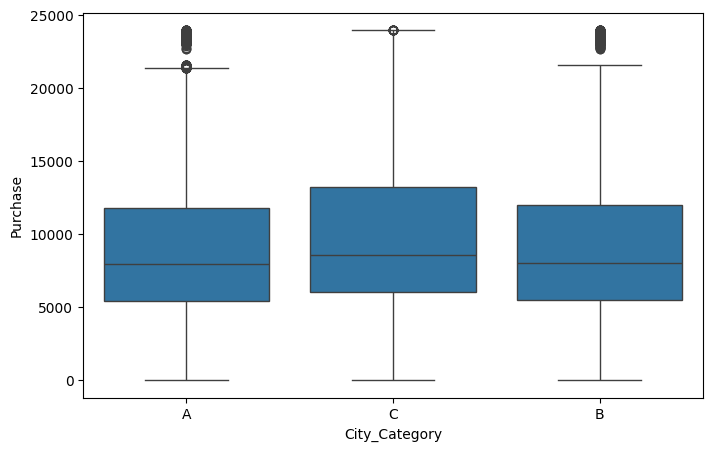

In [36]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y ='Purchase', x = 'City_Category')
plt.show()

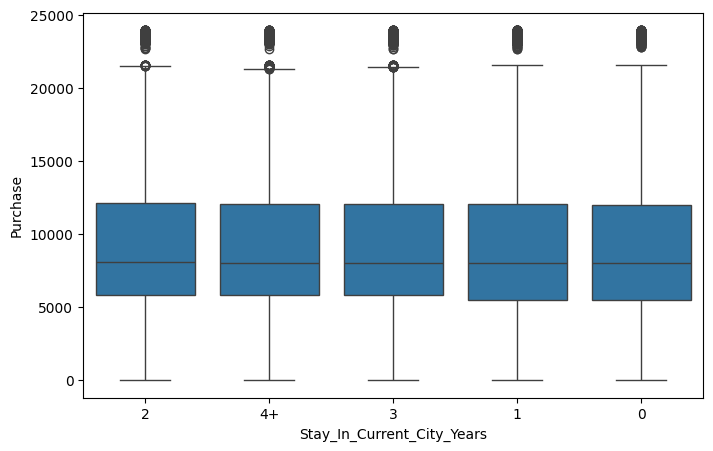

In [35]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years')
plt.show()

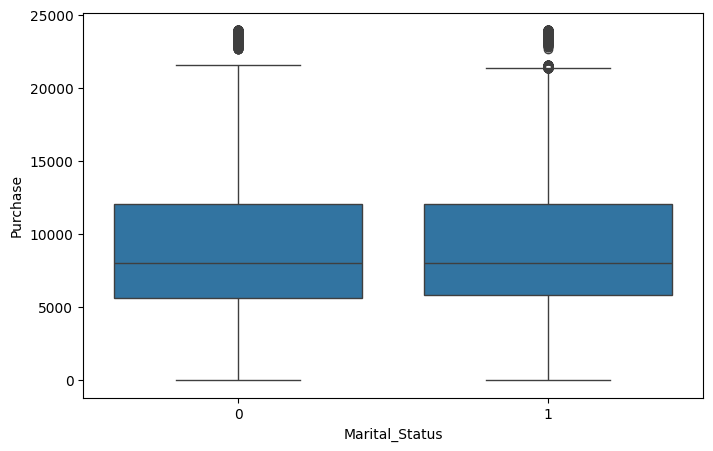

In [39]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status')
plt.show()

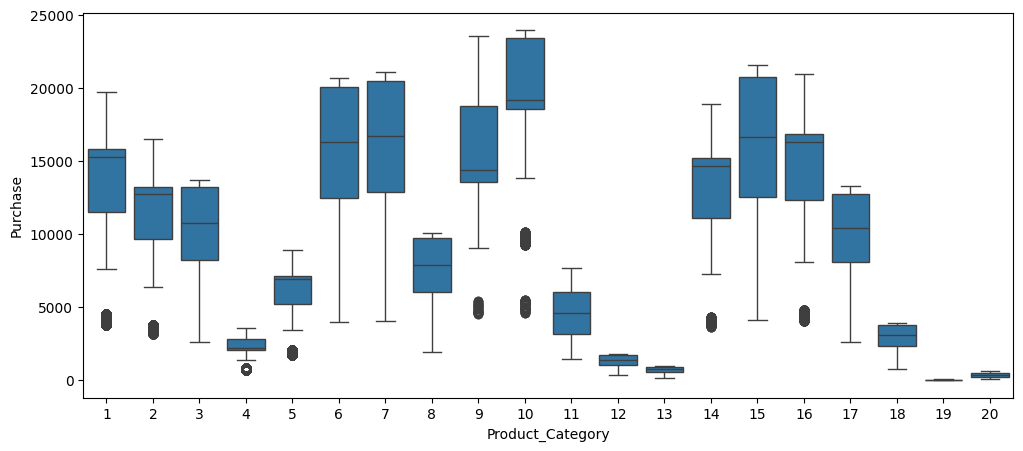

In [42]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category')
plt.show()

In [19]:
df.groupby(['Product_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


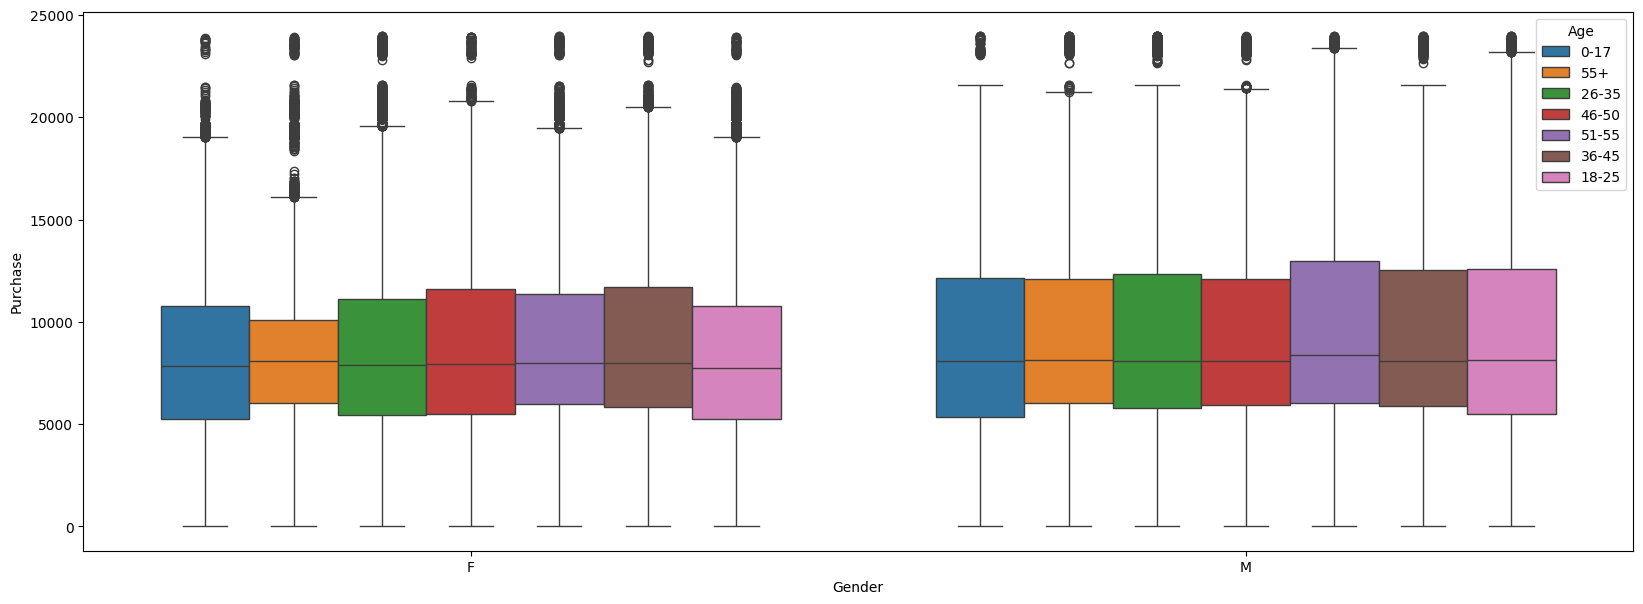

In [69]:
plt.figure(figsize = (20,7))
sns.boxplot(data=df, x='Gender',y='Purchase', hue='Age')
plt.show()

-->The median values for 18-25 age females is the lowest and almost same for the rest.
-->The median values for all age categories is almost the same and is a bit for 51-55 age group among males

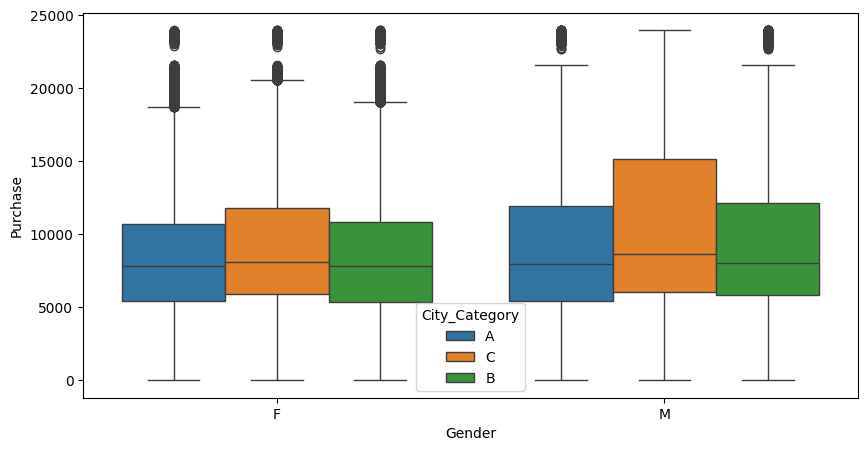

In [71]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category')
plt.show()

--->The median value for females and males in city category C is highest compared to city A and B.

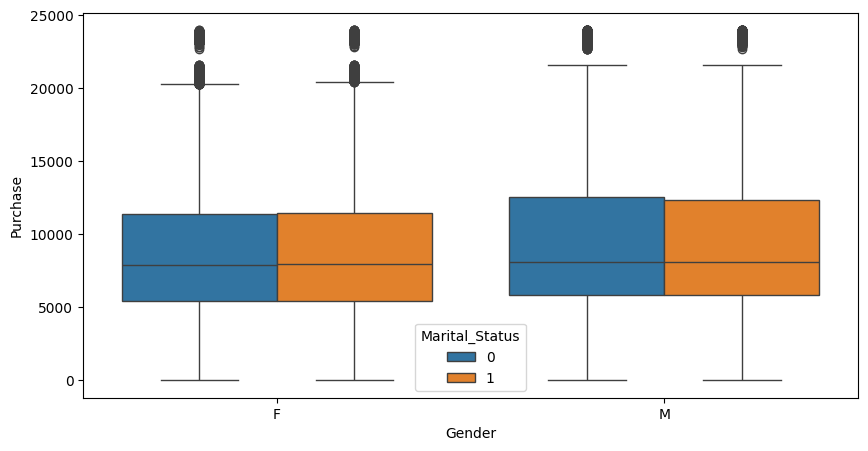

In [72]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status')
plt.show()

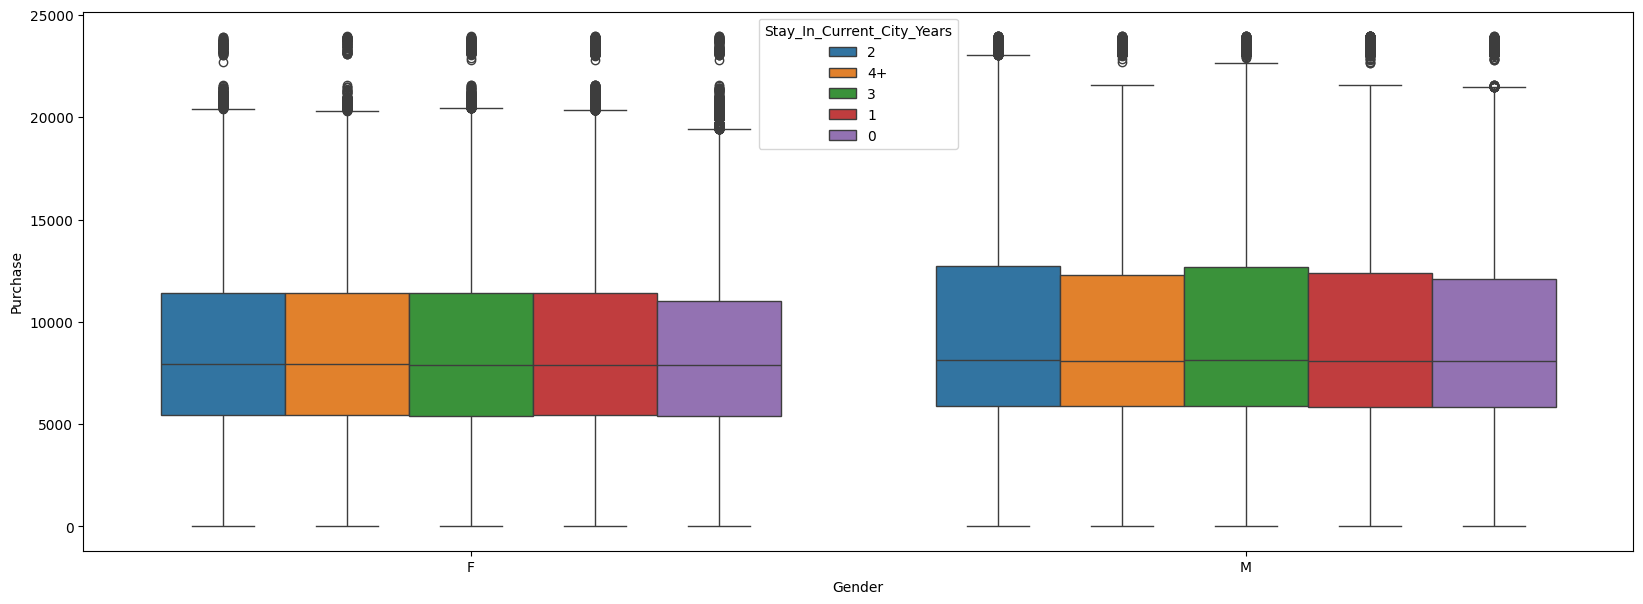

In [76]:
plt.figure(figsize = (20,7))
sns.boxplot(data=df, x='Gender',y='Purchase', hue='Stay_In_Current_City_Years')
plt.show()

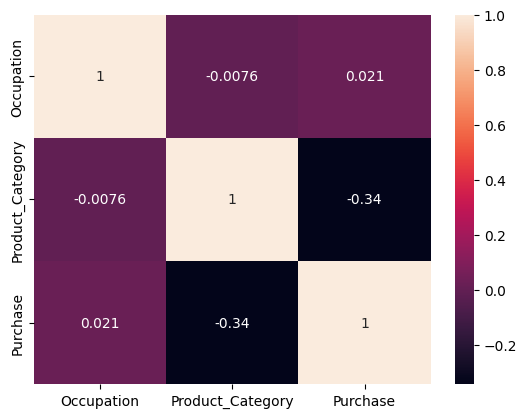

In [83]:
selected_columns = ['Occupation', 'Product_Category', 'Purchase']
selected_df = df[selected_columns]
sns.heatmap(selected_df.corr(), annot=True)
plt.show()

-->Negative Correlation(-0.0076) between Product Category and Occupation.
--> very little Positive Correlation(0.021) between Purchase and Occupation.
-->Negative Correlation(-0.34) between Product Category and Purchase.

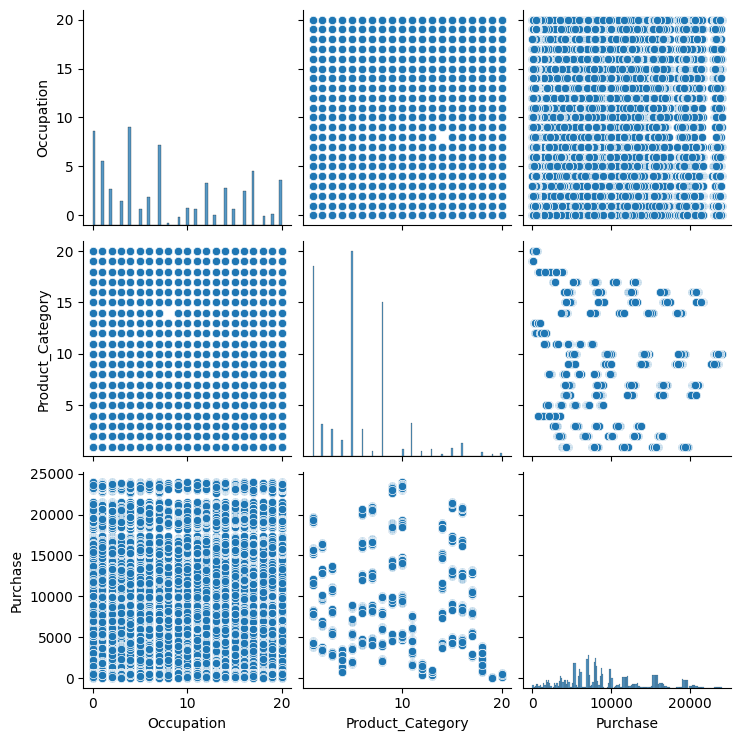

In [89]:
sns.pairplot(df[selected_columns])
plt.show()

In [2]:
from scipy.stats import norm

In [19]:
# z-score for 90% confidence interval
norm.ppf((1+0.90)/2)

1.6448536269514722

In [86]:
def confidence_interval(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100
    
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]
    
    # For sample1 - calculating mean and standard deviation
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)

    male_upper_limit = mean1 + 1.65 * sigma1
    male_lower_limit = mean1 - 1.65 * sigma1
       
    # For sample2 - calculating mean and standard deviation
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)

    female_upper_limit = mean2 + 1.65 * sigma2
    female_lower_limit = mean2 - 1.65 * sigma2

    return sample1_n, sample2_n, male_upper_limit, male_lower_limit, female_upper_limit, female_lower_limit

In [21]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [87]:
# At confidence Interval 90 we took different sample sizes and iterate for 1000 times
sample_sizes = [10, 100, 1000, 10000, 100000]
ci = 90
itr_size = 1000

results = []

for i in sample_sizes:
    sample1_n, sample2_n, male_upper_limit, male_lower_limit, female_upper_limit, female_lower_limit = confidence_interval(df_male['Purchase'], df_female['Purchase'], i, itr_size, ci)
    
    results.append({'Gender': 'Male','Sample Size': i, 'Upper Limit': round(male_upper_limit,2), 'Lower Limit': round(male_lower_limit,2), 'Sample Mean': mean1, 'Confidence Interval': ci, 'Interval Range': [round(male_upper_limit,2), round(male_lower_limit,2)]})
    results.append({'Gender': 'Female','Sample Size': i,'Upper Limit': round(female_upper_limit,2),'Lower Limit':round(female_lower_limit,2), 'Sample Mean': mean2, 'Confidence Interval': ci, 'Interval Range': [round(female_upper_limit,2),round(female_lower_limit,2)]})

res = pd.DataFrame(results)

In [38]:
# Appending the results in to a dataframe
res

,Gender,Sample Size,Upper Limit,Lower Limit,Sample Mean,Confidence Interval,Interval Range
0,Male,10,12141.58,6810.35,9437.686420,90,"[12141.58, 6810.35]"
1,Female,10,11258.88,6158.55,8734.466445,90,"[11258.88, 6158.55]"
2,Male,100,10289.35,8587.90,9437.686420,90,"[10289.35, 8587.9]"
3,Female,100,9492.61,7965.91,8734.466445,90,"[9492.61, 7965.91]"
4,Male,1000,9701.77,9171.74,9437.686420,90,"[9701.77, 9171.74]"
5,Female,1000,8974.78,8488.19,8734.466445,90,"[8974.78, 8488.19]"
6,Male,10000,9523.19,9358.20,9437.686420,90,"[9523.19, 9358.2]"
7,Female,10000,8807.18,8656.10,8734.466445,90,"[8807.18, 8656.1]"
8,Male,100000,9462.47,9413.05,9437.686420,90,"[9462.47, 9413.05]"
9,Female,100000,8747.34,8721.59,8734.466445,90,"[8747.34, 8721.59]"


-Overlapping confidence intervals are more likely to indicate that there is no statistically significant difference between group means.Overlapping confidence intervals may not provide strong evidence against a difference between group means due to the limited precision of estimates with small sample sizes.(in case of sample size 10)

-Non-overlapping confidence intervals are more likely to suggest a statistically significant difference between group means due to the increased precision and reduced margin of error(in case of sample size 100000)

Observations:-
The CI with 90% confidence for sample size 10 for Males is [12141.58, 6810.35]
The CI with 90% confidence for sample size 10 for Females is [11258.88,6158.55]
For Sample size 10 The confidence interval for both Male and Female is overlapping

Now we can increase the sample size , we can see the interval ranges dont overalap.

The CI with 90% confidence for sample size 100000 for Males is [9462.47, 9413.05]
The CI with 90% confidence for sample size 100000 for Females is [8747.34, 8721.59]
For Sample size 100000 The confidence interval for both Male and Female is now not overlapping.

<Figure size 1500x800 with 0 Axes>

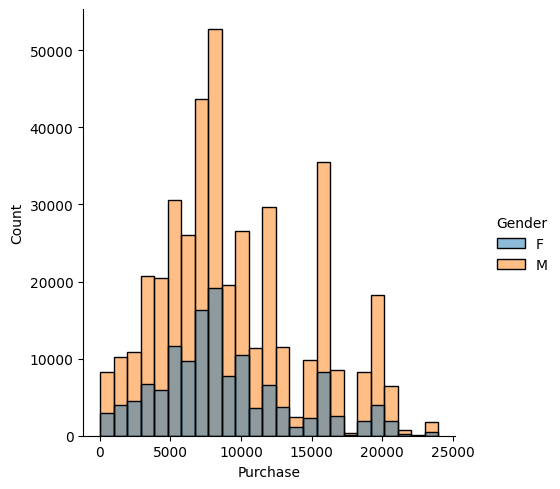

In [21]:
plt.figure(figsize=(15,8))
sns.displot(x= 'Purchase',data=df,hue='Gender',bins=25)
plt.show()

In [61]:
df_married = df[df['Marital_Status'] == 1]
df_unmarried = df[df['Marital_Status'] == 0]

In [66]:
sample_sizes = [10, 100, 1000, 10000, 100000]
ci = 90
itr_size = 1000

results1 = []

for i in sample_sizes:
    sample_size = min(i, len(df_married), len(df_unmarried))
    sample1_n, sample2_n, male_upper_limit, male_lower_limit, female_upper_limit, female_lower_limit = confidence_interval(df_married['Purchase'], df_unmarried['Purchase'], sample_size, itr_size, ci)
    
    results1.append({'Marital_Status': 'Married', 'Sample Size': sample_size, 'Upper Limit': round(male_upper_limit, 2), 'Lower Limit': round(male_lower_limit, 2), 'Sample Mean': mean1, 'Confidence Interval': ci, 'Interval Range': [round(male_upper_limit, 2), round(male_lower_limit, 2)]})
    results1.append({'Marital_Status': 'unmarried', 'Sample Size': sample_size, 'Upper Limit': round(female_upper_limit, 2), 'Lower Limit': round(female_lower_limit, 2), 'Sample Mean': mean2, 'Confidence Interval': ci, 'Interval Range': [round(female_upper_limit, 2), round(female_lower_limit, 2)]})

res1 = pd.DataFrame(results1)


In [67]:
res1

,Marital_Status,Sample Size,Upper Limit,Lower Limit,Sample Mean,Confidence Interval,Interval Range
0,Married,10,11922.24,6740.17,9437.686420,90,"[11922.24, 6740.17]"
1,unmarried,10,11915.20,6543.02,8734.466445,90,"[11915.2, 6543.02]"
2,Married,100,10062.32,8439.82,9437.686420,90,"[10062.32, 8439.82]"
3,unmarried,100,10104.13,8414.10,8734.466445,90,"[10104.13, 8414.1]"
4,Married,1000,9531.77,9009.15,9437.686420,90,"[9531.77, 9009.15]"
5,unmarried,1000,9528.84,8995.61,8734.466445,90,"[9528.84, 8995.61]"
6,Married,10000,9339.92,9177.36,9437.686420,90,"[9339.92, 9177.36]"
7,unmarried,10000,9346.28,9186.09,8734.466445,90,"[9346.28, 9186.09]"
8,Married,100000,9280.39,9241.92,9437.686420,90,"[9280.39, 9241.92]"
9,unmarried,100000,9288.19,9243.21,8734.466445,90,"[9288.19, 9243.21]"


Observations:-
The CI with 90% confidence for sample size 10 for Married customers is [11922.24,6740.17]
The CI with 90% confidence for sample size 10 for unmarried customers is [11915.2,6543.02]
For Sample size 10 The confidence interval for both Married and unmarried is overlapping

Now we can increase the sample size , we can see the interval ranges dont overalap.

The CI with 90% confidence for sample size 100000 for Married is [9280.39,9241.92]
The CI with 90% confidence for sample size 100000 for unmarried is [9288.19,9243.21]
For Sample size 100000 The confidence interval for both Male and Female is now still overlapping.
--->This means we can conclude that there is no effect of marital status on purchase habits of customers

<Figure size 1600x800 with 0 Axes>

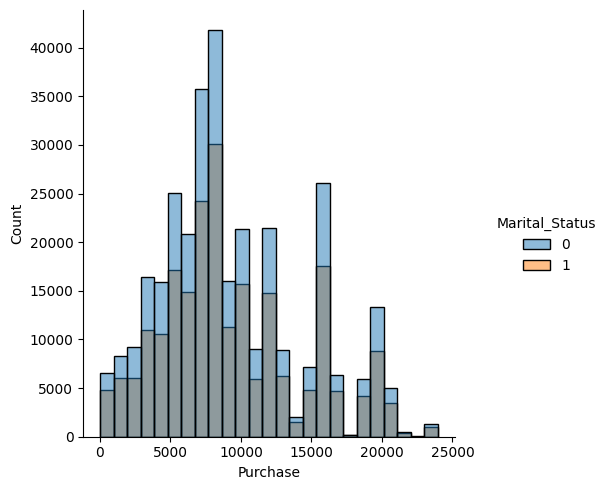

In [23]:
plt.figure(figsize = (16,8))
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [78]:
def ci_age(sample, sample_size, itr_size=1000, ci = 90):
    ci = ci/100
        
    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]
        
    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    
    Age_upper_limit = mean + 1.65 * sigma
    Age_lower_limit = mean - 1.65 * sigma
    
    return mean,Age_upper_limit, Age_lower_limit

In [80]:
sample_size = 1000
ci = 90
itr_size = 1000
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

results2 = []

for i in age_group:
    sample_mean, Age_upper_limit, Age_lower_limit = ci_age(df[df['Age']==i]['Purchase'], sample_size, itr_size, ci)
    
    results2.append({'Age_Group': i, 'Sample Size': sample_size, 'Upper Limit': round(Age_upper_limit, 2), 'Lower Limit': round(Age_lower_limit, 2), 'Sample Mean': sample_mean, 'Confidence Interval': ci, 'Interval Range': [round(Age_upper_limit, 2), round(Age_lower_limit, 2)]})
    
res2 = pd.DataFrame(results2)


In [81]:
res2

,Age_Group,Sample Size,Upper Limit,Lower Limit,Sample Mean,Confidence Interval,Interval Range
0,0-17,1000,9204.95,8667.95,8936.449368,90,"[9204.95, 8667.95]"
1,18-25,1000,9431.49,8896.56,9164.027115,90,"[9431.49, 8896.56]"
2,26-35,1000,9513.35,8985.62,9249.486959,90,"[9513.35, 8985.62]"
3,36-45,1000,9598.20,9076.72,9337.461074,90,"[9598.2, 9076.72]"
4,46-50,1000,9460.48,8946.05,9203.261344,90,"[9460.48, 8946.05]"
5,51-55,1000,9814.05,9271.68,9542.866332,90,"[9814.05, 9271.68]"
6,55+,1000,9579.52,9080.85,9330.187390,90,"[9579.52, 9080.85]"


-->At 90% confidence interval,with 1000 as sample size,
-Age group 0-17 has the least purchase value range of [9204.95, 8667.95]
-Age group 51-55 has highest purchase value range of [9814.05, 9271.68]

We can say that age group does not have much effect on the spending of customers at 90% confidence interval as their interval range is overalpping at all age groups(with 1000 sample size)

In [3]:
# z_score at 95% confidence interval
z_score = norm.ppf((1+0.95)/2)
z_score

1.959963984540054

In [37]:
sample_x = 10
iterations = 1000

male_sample_mean = [df[df["Gender"]=="M"].sample(sample_x,replace=True)["Purchase"].mean() for i in range(iterations)]
np.mean(male_sample_mean)

9474.223

In [39]:
sample_y = 10
itrrations = 1000

female_sample_mean = [df[df["Gender"]=="F"].sample(sample_y, replace=True)["Purchase"].mean() for i in range(iterations)]
np.mean(female_sample_mean)

8725.9587

In [41]:
np.std(male_sample_mean)

1661.66380798614

In [46]:
male_upper_limit = np.mean(male_sample_mean) + z_score * np.std(male_sample_mean)
male_lower_limit = np.mean(male_sample_mean) - z_score * np.std(male_sample_mean)
(male_upper_limit,male_lower_limit)

(12731.024218066514, 6217.421781933486)

In [42]:
np.std(female_sample_mean)

1520.8592275238068

In [47]:
female_upper_limit = np.mean(female_sample_mean) + z_score * np.std(female_sample_mean)
female_lower_limit = np.mean(female_sample_mean) - z_score * np.std(female_sample_mean)
(female_upper_limit,female_lower_limit)

(11706.788011502067, 5745.12938849793)

--> For Sample size 10,at confidence interval (at 95%) for both Male and Female is overlapping
--> similarly for different iterations for different samples are to be derived 

In [15]:
# z_score at 99% confidence Interval
z_val = norm.ppf((1+0.99)/2)
z_val

2.5758293035489004

In [44]:
male_upper_limit = np.mean(male_sample_mean) + z_val * np.std(male_sample_mean)
male_lower_limit = np.mean(male_sample_mean) - z_val * np.std(male_sample_mean)
(male_upper_limit,male_lower_limit)

(13754.385329257353, 5194.060670742647)

In [45]:
female_upper_limit = np.mean(female_sample_mean) + z_val * np.std(female_sample_mean)
female_lower_limit = np.mean(female_sample_mean) - z_val * np.std(female_sample_mean)
(female_upper_limit,female_lower_limit)

(12643.432464828566, 4808.484935171433)

--> At 99% confidence level,with sample size 10 the range is overlapping

---> similarly at 95% and 99% confidence interval with different sample sizes and iterations ,with corresponding z value are to be calculated for gender,age and marital_status to derive purchasing behaviour of customers based on these factors

In [34]:
# Outlier detection for purchase column
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

IQR = Q3 - Q1
IQR

6231.0

In [35]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


--> Major outliers are in the range of purchasing range 23k with product category 10

Inferences:-
1) 40% of the customers are between the age 26-35,followed by 20% under 36-45
2) 75% of the customers are male and 25% are female,this indicates that male customers are spending more than female customers
3) 59% of customers are single-unmarried, 41% are married
4) 35% Staying in the city since 1 year, 18% since 2 years, 17% since 3 years
5) The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
6) Majority of customers purchase within the 5,000 - 20,000 range.
7) The male customers are 3 times to female customers in the age category of 26-35
8) 5,1,8 are most popular products that are sold more among gender and marital status composition 
9) 9,14,17,19,20 are the least popular products among gender and marital status composition
10) There is a domination of married customers among age groups 46-50,51-55
11) Products 1,5,8 are dominant in three cities A,B,C
12) The median value of purchase of city A,B are approximately same 
13) The median value of purchase rate on the basis of Marital_satatus and stay in current city are approximately equal
14) There is huge differences in the median values for all the product categories.
15) The median value for product category 10 is the highest which is 19197 and for product category 19 is lowest which is 37.
16) The average order value for category 10 is the highest which is 19675 and for category 19 is also the lowest which is 37.
17) The mean purchase value of given dataset is 9264.

Recommendations:-
1) Walmart should focus on increasing the female customers and retaining male customers.Some incentives and offers on female and generic products for female customers on frequent basis can attract them more.
2) The company should focus on promoting products like 9,14,17,19,20 as they have less purchasing frequency
3) Married customers should be focused up on as they are less than unmarried customers.products which are more of a family use are to be acquired to attract them
4) Customers in the age 18-45 spend more money than the others, So company should focus on other age groups as well to increase customer base
5) Male customers living in City_Category C spend more money than other male customers living in B or C.so city category A,B are to be focused to increase the revenue.
6) The customers under age group 0-17 are to be focused up on with variety of products from toys,games to academic things
7) More advertisement and promotion of items which are less popular is to be considered
8) Based on the city composition for A,B city categories-innovative ways like keeping offers on specific holidays(related to city),advertising by popular celebrities can increase the revenue
9) customers fall under Occupations like 8,9,13,18,19 are to be focused up on - More variety of products according to their occupation are to be focused up on
10) The focus must be on increasing the mean purchase value of customers over all